In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/ecommerce_reviews_classification.csv")
df


,review_id,rating_dup,user_id,sentiment,helpful_votes,rating,review_text,verified_purchase,product_id
0,R90000,5.0,20105.0,positive,125.0,5.0,Good roduct,No,1033.0
1,R90001,5.0,NaN,positive,80.0,5.0,Terrible quality,No,1080.0
2,R90002,4.0,20356.0,positive,21.0,4.0,NaN,No,1074.0
3,R90003,5.0,20007.0,positive,189.0,5.0,Excellent!,Yes,1092.0
4,R90004,5.0,20261.0,positive,55.0,5.0,Not as expected,Yes,1033.0
...,...,...,...,...,...,...,...,...,...
260,R90056,NaN,20386.0,neutral,14.0,NaN,Terrible quality,Yes,1017.0
261,R90153,4.0,20087.0,positive,197.0,4.0,Terrible quality,No,1064.0
262,R90032,5.0,20481.0,positive,43.0,5.0,Value for money,YES,1088.0
263,R90096,5.0,20173.0,positive,74.0,5.0,Would buy again,No,1080.0


In [130]:
df = df.drop(columns=['review_id', 'user_id','product_id'])

In [131]:
print(df.dtypes)
df.isnull().sum()

rating_dup           float64
sentiment             object
helpful_votes        float64
rating               float64
review_text           object
verified_purchase     object
dtype: object


,0
rating_dup,9
sentiment,13
helpful_votes,17
rating,9
review_text,20
verified_purchase,19


In [132]:
df.columns

Index(['rating_dup', 'sentiment', 'helpful_votes', 'rating', 'review_text',
       'verified_purchase'],
      dtype='object')

In [133]:
cols = ['rating_dup', 'helpful_votes', 'rating']

In [134]:
for col in cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [135]:
df.isnull().sum()

,0
rating_dup,0
sentiment,13
helpful_votes,0
rating,0
review_text,20
verified_purchase,19


In [136]:
df['sentiment'].unique()

array(['positive', 'neutral', 'negative', nan], dtype=object)

In [137]:
df['sentiment'].fillna(df['sentiment'].mode()[0], inplace=True)
df['review_text'].fillna(df['review_text'].mode()[0], inplace=True)
df['sentiment'].isnull().sum()
df['review_text'].isnull().sum()

/tmp/ipython-input-3980452160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].fillna(df['sentiment'].mode()[0], inplace=True)
/tmp/ipython-input-3980452160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

np.int64(0)

In [138]:
df["verified_purchase"].unique()

array(['No', 'Yes', nan, 'Ye', 'Ys', 'YES', 'es', 'NO', 'o', 'N'],
      dtype=object)

In [154]:
df["verified_purchase"].replace(["Yes", "Ye", "Ys","es","nan","YES"], "Yes", inplace=True)
df["verified_purchase"].fillna("Yes", inplace=True)
df["verified_purchase"].replace(["No", "N","NO","o"], "No", inplace=True)
df["verified_purchase"].fillna("No", inplace=True)

In [155]:
df.isnull().sum()

,0
rating_dup,0
sentiment,0
helpful_votes,0
rating,0
review_text,0
verified_purchase,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating_dup         265 non-null    float64
 1   sentiment          265 non-null    object 
 2   helpful_votes      265 non-null    float64
 3   rating             265 non-null    float64
 4   review_text        265 non-null    object 
 5   verified_purchase  265 non-null    object 
dtypes: float64(3), object(3)
memory usage: 12.6+ KB


In [157]:
print(df['verified_purchase'].value_counts())
df['sentiment'].value_counts()

verified_purchase
Yes    194
No      71
Name: count, dtype: int64


,count
sentiment,
positive,177
neutral,48
negative,40


In [158]:

df.to_csv("cleaned_dataset.csv", index=False)


#Numerical Columns

## Histogram of ratings

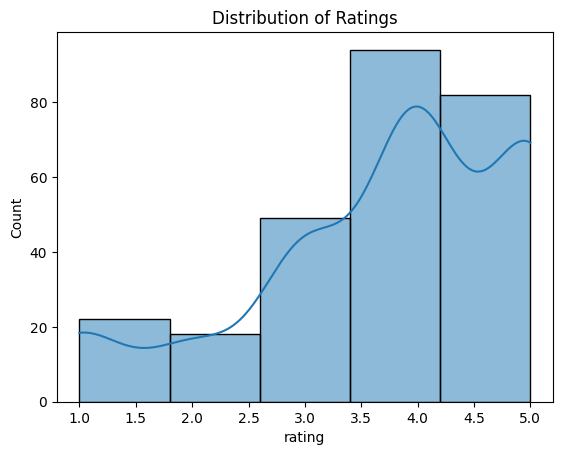

In [159]:
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.show()

Here we can see maximum ratings for the products


## Distribution of helpful_votes

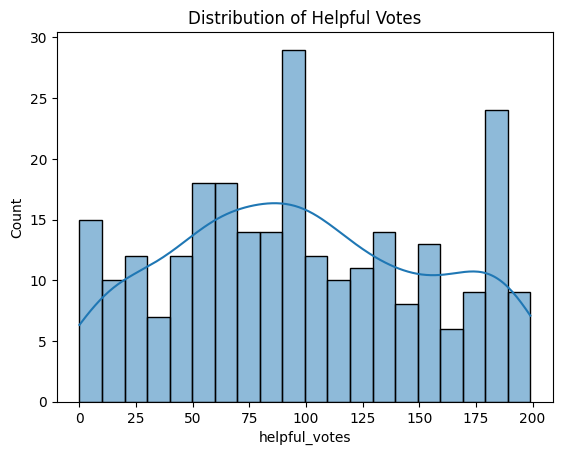

In [145]:
sns.histplot(df['helpful_votes'], bins=20, kde=True)
plt.title("Distribution of Helpful Votes")
plt.show()

Here we can see maximum helpful votes for the products

#Categorical Values

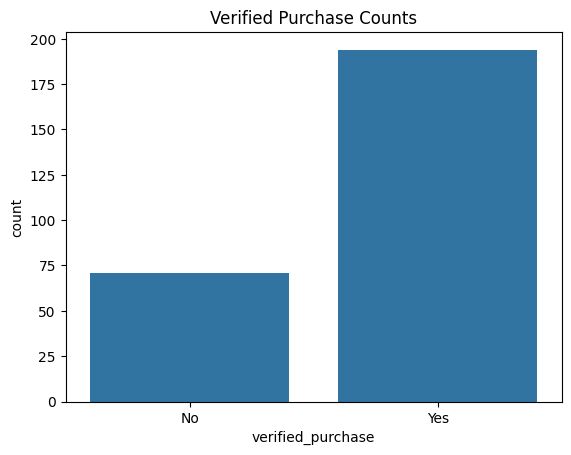

In [160]:
sns.countplot(x='verified_purchase', data=df)
plt.title("Verified Purchase Counts")
plt.show()


Here we can see most of the purchases are verified and we have some unverified purchases

##Sentiment Analysis of Reviews

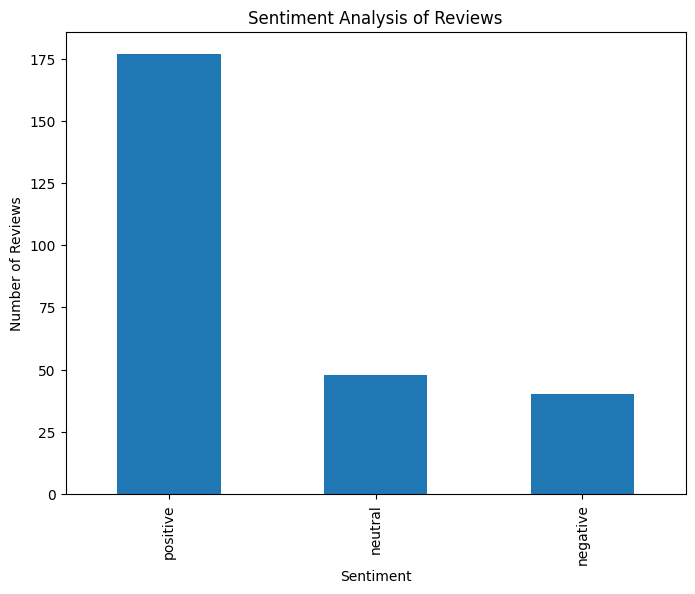

In [146]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')

plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

plt.show()

Most of the people giving their review as positive and some peope giving neutral and negative reviews

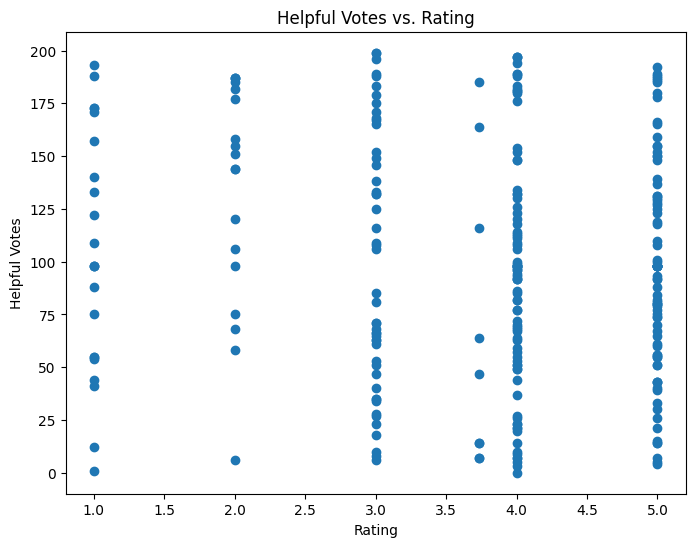

In [147]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['helpful_votes'])

plt.title('Helpful Votes vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')

plt.show()

In [148]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

print(corr_matrix)

               rating_dup  helpful_votes    rating
rating_dup       1.000000      -0.099985  1.000000
helpful_votes   -0.099985       1.000000 -0.099985
rating           1.000000      -0.099985  1.000000


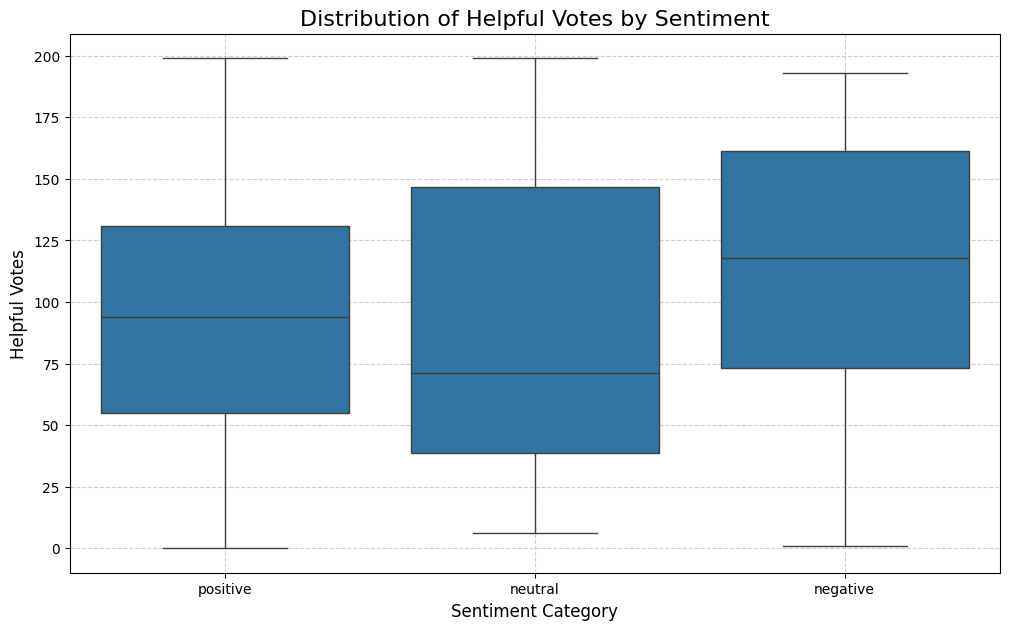

In [149]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='sentiment', y='helpful_votes', order=['positive', 'neutral', 'negative'])

plt.title('Distribution of Helpful Votes by Sentiment', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Helpful Votes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()